## PREPROCESSING

1. Remove inappropriate games
2. Remove rows that are not games
3. plots before PP
4. Removing NaN values
5. droping the columns
6. categorical to numerical
7. plots
8. Remove outliers
9. scaling
10. PCA
11. plots

---

CLUSTERING


### Imports


In [84]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from main_functions import *

### Loading the dataset


In [85]:
df = pd.read_csv("games.csv")
df.head()
df.describe()
df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x7fe696ee4560>,
 [Text(1.1596982558769504, 0.30838280645321214, 'Unappropriate entries'),
  Text(0.9156110854178914, 0.7756650954244819, 'Utilities'),
  Text(-0.9938456768829481, -0.47145601124715225, 'Appropriate entries')],
 [Text(0.6764906492615544, 0.17988997043104038, '8.3%'),
  Text(0.53410646649377, 0.4524713056642811, '5.8%'),
  Text(-0.5420976419361534, -0.2571578243166285, '85.9%')])

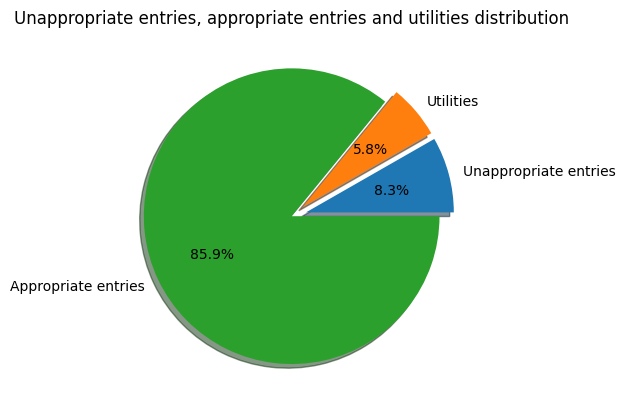

In [86]:
# 85102
# 77626
# 72361

labels = "Unappropriate entries", "Utilities", "Appropriate entries"
sizes = np.array([(85102 - 77626), 77626- 72361, 77626]) / 85102
explode = (0.1, 0.1, 0)

fig, ax = plt.subplots()
ax.set_title("Unappropriate entries, appropriate entries and utilities distribution")
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)

In [87]:
# Count occurrences for each word removed
# word_counts = {word: 0 for word in inappropriate_words}

# for word in inappropriate_words:
#     pattern = re.compile(r"\b" + re.escape(word) + r"\b", re.IGNORECASE)
#     word_counts[word] = df.apply(
#         lambda row: sum(
#             pattern.search(str(row[col])) is not None for col in columns_to_check
#         ),
#         axis=1,
#     ).sum()

# # Plotting the results
# plt.figure(figsize=(10, 6))
# bars = plt.bar(word_counts.keys(), word_counts.values(), color="skyblue")

# # Add labels on top of the bars
# for bar in bars:
#     height = bar.get_height()
#     plt.text(
#         bar.get_x() + bar.get_width() / 2,
#         height,
#         f"{int(height)}",
#         ha="center",
#         va="bottom",
#     )

# plt.xlabel("Words Removed")
# plt.ylabel("Number of Rows Containing the Word")
# plt.title("Number of Rows Removed Containing Each Word")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

### Removing the inappropriate games


In [88]:
# Filter out rows that contain any word in the specified columns
df_filtered = df[~df.apply(contains_inappropriate_word, axis=1)]
df = df_filtered
df.shape
# Display the filtered dataset
# df_filtered

(77625, 39)

### Plots


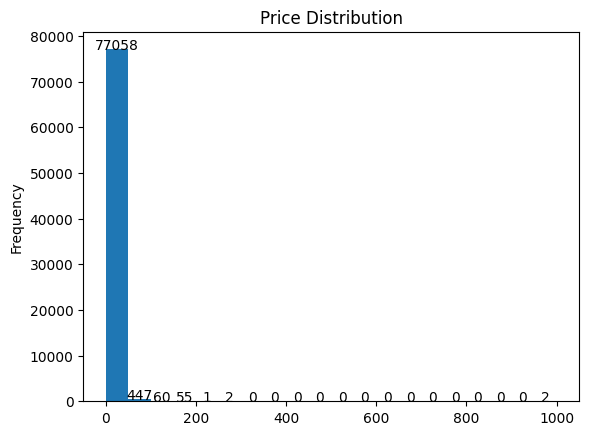

In [89]:
# Create the histogram plot for Price
ax = df["Price"].plot(kind="hist", bins=20, title="Price Distribution")

# Annotate the bars with the respective count values
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
    )

# Show the plot
plt.show()

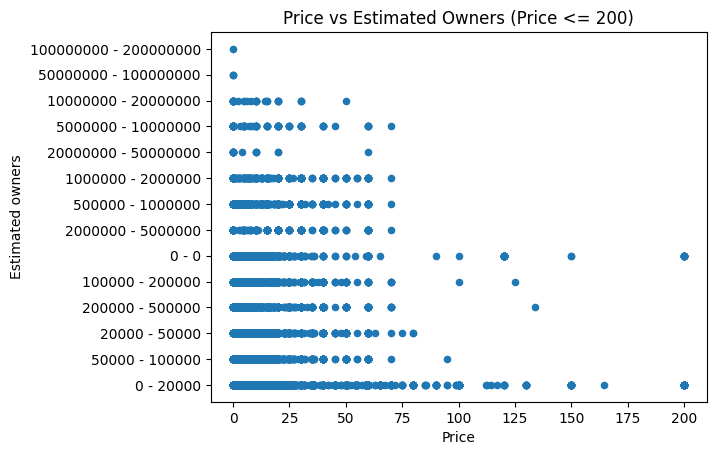

In [90]:
# Filter the data to zoom in on Price <= 200
df_filtered = df[df["Price"] <= 200]

# Replot the scatter plot for Price vs Estimated Owners (Price <= 200)
df_filtered.plot(
    kind="scatter",
    x="Price",
    y="Estimated owners",
    title="Price vs Estimated Owners (Price <= 200)",
)
plt.show()

In [91]:
# Summary statistics for Price
price_summary = df["Price"].describe()
print(price_summary)

count    77625.000000
mean         7.039673
std         11.948295
min          0.000000
25%          0.990000
50%          4.240000
75%          9.990000
max        999.980000
Name: Price, dtype: float64


Price Range
0-50       61370
51-100       447
101-150       60
151-200       55
201-500        3
501+           2
Name: count, dtype: int64


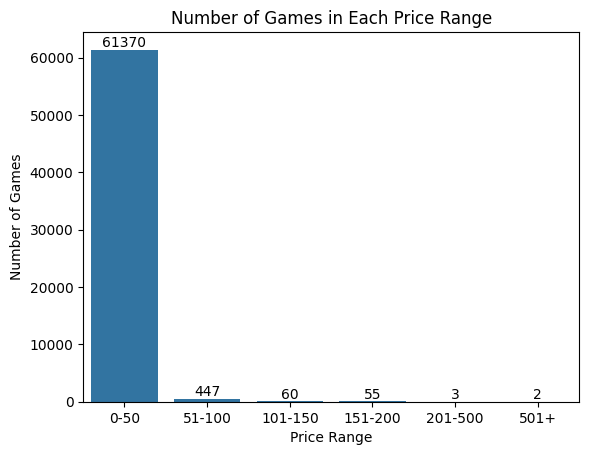

In [92]:
# Create bins for Price ranges
df["Price Range"] = pd.cut(
    df["Price"],
    bins=[0, 50, 100, 150, 200, 500, 1000],
    labels=["0-50", "51-100", "101-150", "151-200", "201-500", "501+"],
)

# Count the number of games in each price range
price_range_counts = df["Price Range"].value_counts().sort_index()
print(price_range_counts)

# Plot the distribution of games across price ranges
ax = sns.barplot(x=price_range_counts.index, y=price_range_counts.values)

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
    )

plt.title("Number of Games in Each Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Games")
plt.show()

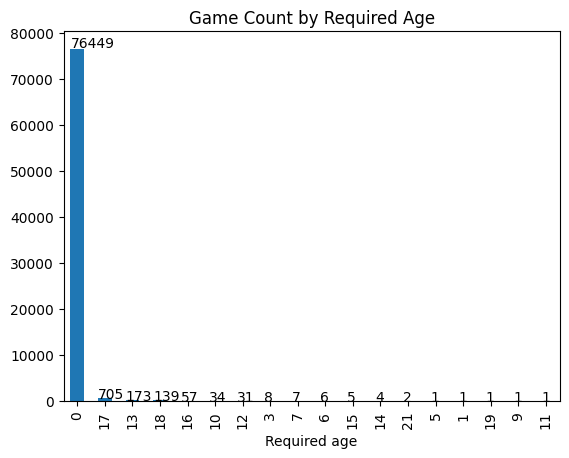

In [93]:
# Create the bar plot for the distribution of games by Required age
ax = (
    df["Required age"]
    .value_counts()
    .plot(kind="bar", title="Game Count by Required Age")
)

# Annotate the bars with the respective count values
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Show the plot
plt.show()

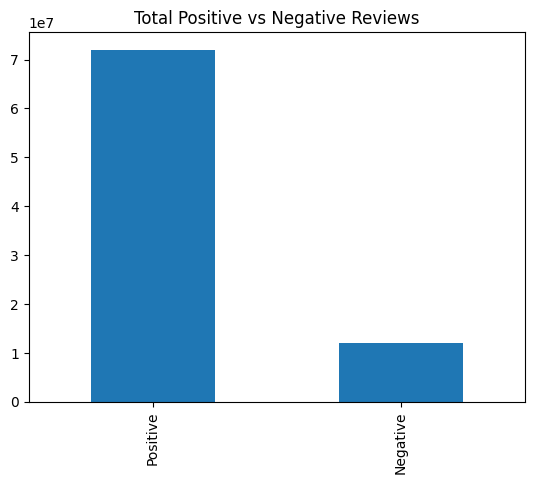

In [94]:
# Bar chart for positive and negative reviews
df[["Positive", "Negative"]].sum().plot(
    kind="bar", title="Total Positive vs Negative Reviews"
)
plt.show()

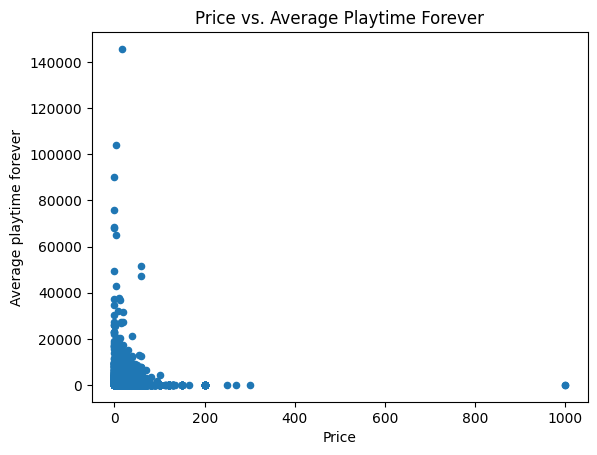

In [95]:
# Scatter plot for Price vs. Average playtime forever
df.plot(
    kind="scatter",
    x="Price",
    y="Average playtime forever",
    title="Price vs. Average Playtime Forever",
)
plt.show()

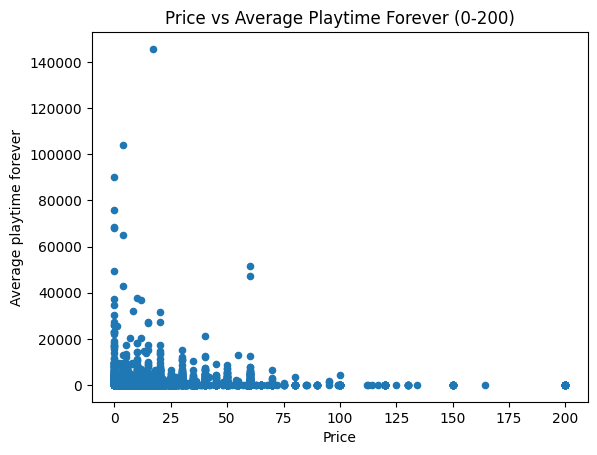

In [96]:
# Filter to zoom in on Price range between 0 and 200
df_filtered = df[df["Price"] <= 200]

# Plot the filtered data
df_filtered.plot(
    kind="scatter",
    x="Price",
    y="Average playtime forever",
    title="Price vs Average Playtime Forever (0-200)",
)
plt.show()

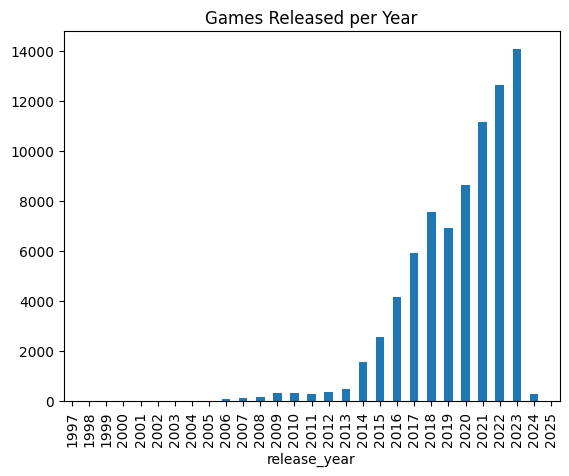

In [97]:
# Plot the number of games released per year
df["release_year"] = df['Release date'].str.extract(r'(\d{4})').astype(int)
df["release_year"].value_counts().sort_index().plot(
    kind="bar", title="Games Released per Year"
)
plt.show()

In [98]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Display the missing values count
print(missing_values)

AppID                             0
Name                              5
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 3547
Supported languages               0
Full audio languages              0
Reviews                       68456
Header image                      0
Website                       40907
Support url                   39154
Support email                 12507
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                73959
User score                        0
Positive                          0
Negative                          0
Score rank                    77622
Achievements                      0
Recommendations                   0
Notes                       

In [99]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt


# # Create a heatmap to visualize missing values
# plt.figure(figsize=(10, 6))
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
# plt.title('Missing Values Heatmap')
# plt.show()

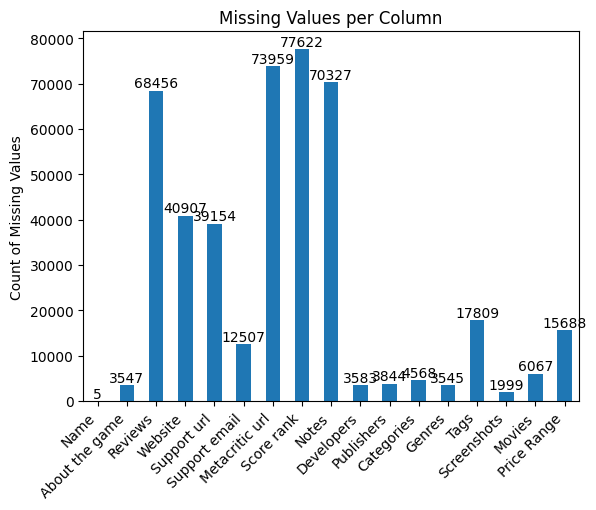

In [100]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Plot the missing values
ax = missing_values.plot(
    kind="bar", title="Missing Values per Column", ylabel="Count of Missing Values"
)
plt.xticks(rotation=45, ha="right")

# Annotate each bar with the number of missing values
for i, v in enumerate(missing_values):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom")

plt.show()

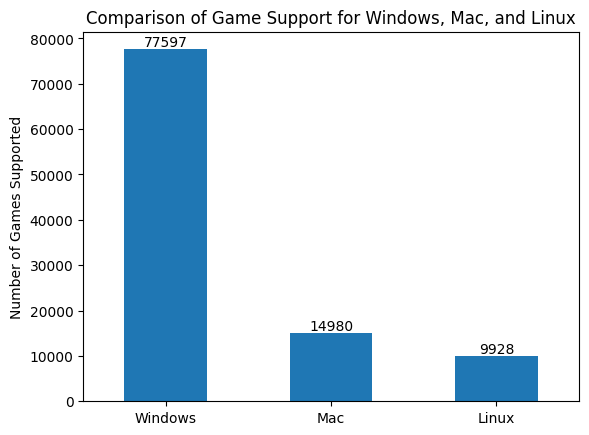

In [101]:
# Summarize the number of games that support each platform (True values indicate support)
platform_support = df[["Windows", "Mac", "Linux"]].apply(
    lambda x: x.value_counts().get(True, 0)
)

# Create a bar plot with the number annotated on top of each bar
ax = platform_support.plot(
    kind="bar",
    title="Comparison of Game Support for Windows, Mac, and Linux",
    ylabel="Number of Games Supported",
)
plt.xticks(rotation=0)

# Annotate the bars with the values
for i, v in enumerate(platform_support):
    ax.text(i, v + 0.1, str(v), ha="center", va="bottom")

plt.show()

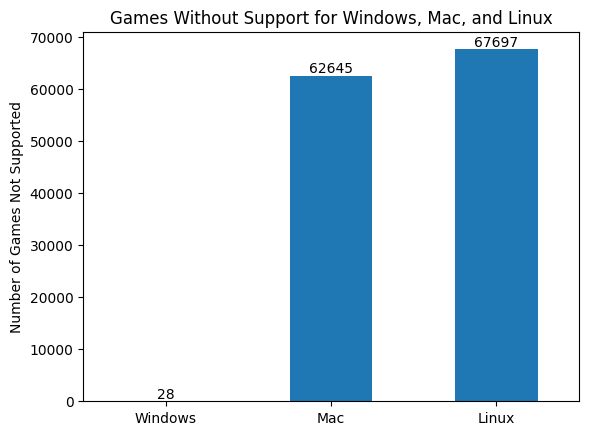

In [102]:
# Count the number of `False` values in each platform column (Windows, Mac, Linux)
platform_no_support = df[["Windows", "Mac", "Linux"]].apply(
    lambda x: (x == False).sum()
)

# Create a bar plot with the number of games that do not support each platform
ax = platform_no_support.plot(
    kind="bar",
    title="Games Without Support for Windows, Mac, and Linux",
    ylabel="Number of Games Not Supported",
)
plt.xticks(rotation=0)

# Annotate the bars with the count of `False` values
for i, v in enumerate(platform_no_support):
    ax.text(i, v + 0.1, str(v), ha="center", va="bottom")

plt.show()

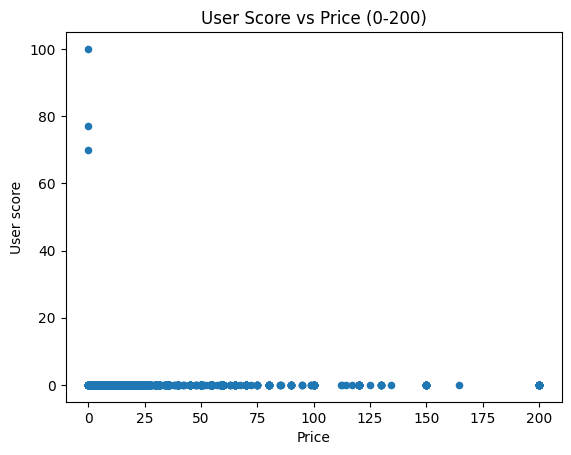

In [103]:
# Zoom in on Price range between 0 and 200
df_price_filtered = df[df["Price"] <= 200]
df_price_filtered.plot(
    kind="scatter", x="Price", y="User score", title="User Score vs Price (0-200)"
)
plt.show()

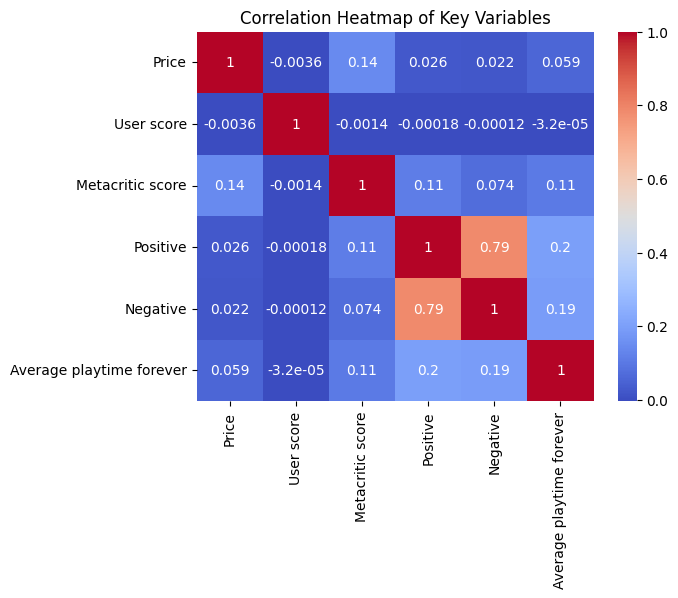

In [104]:
# Correlation heatmap
corr = df[
    [
        "Price",
        "User score",
        "Metacritic score",
        # "Estimated owners",
        # "Reviews",
        "Positive",
        "Negative",
        "Average playtime forever",
    ]
].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Key Variables")
plt.show()

In [105]:
# import seaborn as sns

# # Pair plot for key variables related to clustering
# sns.pairplot(df[['User score', 'Price', 'Estimated owners', 'Average playtime forever']])
# plt.title('Pair Plot of Key Features')
# plt.show()

In [106]:
# Assuming 'Supported languages' is a column with comma-separated language values
df["Supported languages"] = df["Supported languages"].fillna("")

# Split the languages into separate rows (explode)
df_languages = df.assign(
    Supported_languages=df["Supported languages"].str.split(",")
).explode("Supported_languages")

# Strip any leading/trailing spaces
df_languages["Supported_languages"] = df_languages["Supported_languages"].str.strip()

# Get the count of each language
language_counts = df_languages["Supported_languages"].value_counts()
print(language_counts)

Supported_languages
['English']          40268
['English'           29085
'German'             15598
'French'             15451
'Spanish - Spain'    12775
                     ...  
'\r\nFrench'             1
'Tigrinya']              1
['Danish']               1
'Maori']                 1
['Romanian'              1
Name: count, Length: 260, dtype: int64


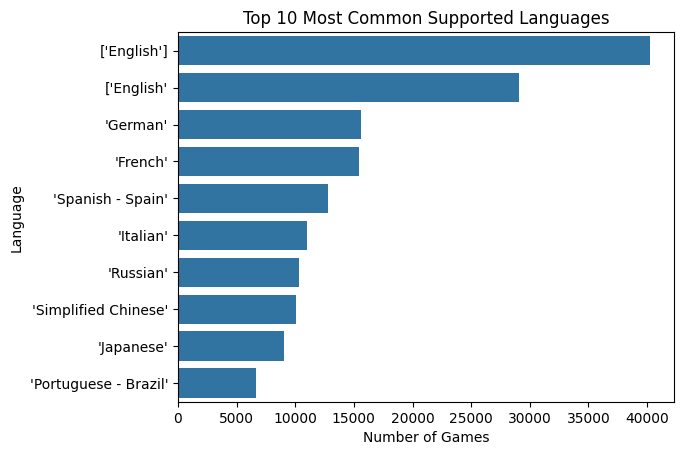

In [107]:
# Plot the top 10 most common languages
top_languages = language_counts.head(10)
sns.barplot(x=top_languages.values, y=top_languages.index)
plt.title("Top 10 Most Common Supported Languages")
plt.xlabel("Number of Games")
plt.ylabel("Language")
plt.show()
###############################################################################################

Genres
Indie                    52210
Action                   31900
Casual                   30355
Adventure                28202
Strategy                 14806
Simulation               14224
RPG                      12421
Early Access              9859
Free to Play              6179
Sports                    3646
                          3545
Racing                    2998
Massively Multiplayer     2055
Utilities                  828
Design & Illustration      488
Violent                    443
Animation & Modeling       397
Education                  391
Video Production           282
Gore                       260
Game Development           235
Software Training          203
Audio Production           200
Photo Editing              136
Web Publishing             107
Accounting                  21
Movie                        2
Documentary                  1
Episodic                     1
Short                        1
Tutorial                     1
360 Video                    1
N

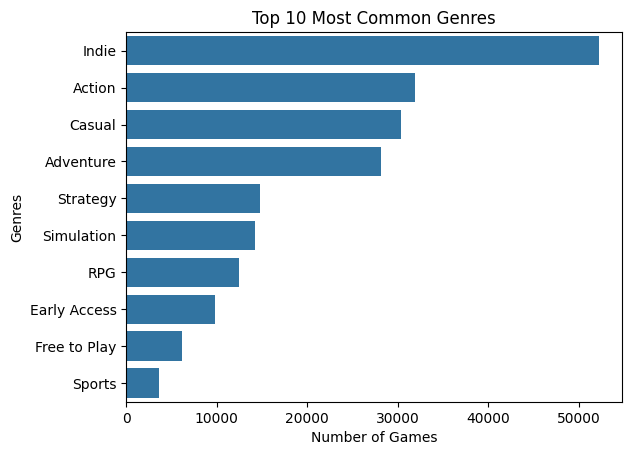

In [108]:
# Assuming 'Genres' is a column with comma-separated values
df["Genres"] = df["Genres"].fillna("")

# Split the genres into separate rows (explode)
df_genres = df.assign(Genres=df["Genres"].str.split(",")).explode("Genres")

# Strip any leading/trailing spaces
df_genres["Genres"] = df_genres["Genres"].str.strip()

# Get the count of each genre
genre_counts = df_genres["Genres"].value_counts()

print(genre_counts)

# Plot the top 10 most common genres
top_genres = genre_counts.head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Most Common Genres")
plt.xlabel("Number of Games")
plt.ylabel("Genres")
plt.show()

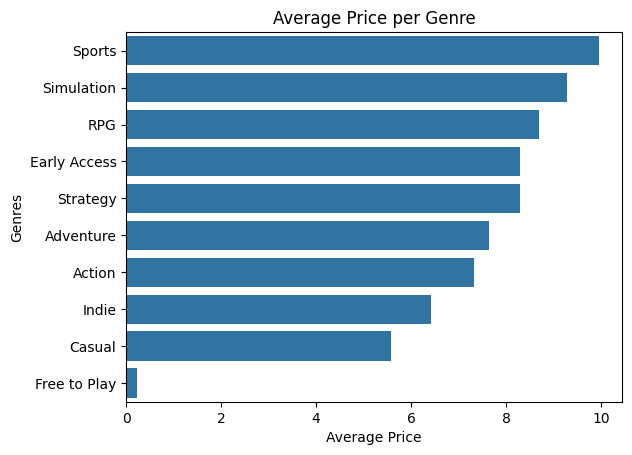

In [109]:
# Group by Genres and calculate the average price for each genre
# avg_price_per_genre = (
#     df_genres.groupby("Genres")["Price"].mean(.so)rt_values(ascending=False)
# )

genres_to_plot = ["Indie", "Action", "Casual", "Adventure", "Strategy", "Simulation", "RPG", "Early Access", "Free to Play", "Sports"]  # specify your desired genres

# Group by Genres and calculate the average price for each genre
avg_price_per_genre = (
    df_genres.groupby("Genres")["Price"].mean().sort_values(ascending=False)
)

# Filter for the specified genres
filtered_avg_price = avg_price_per_genre[avg_price_per_genre.index.isin(genres_to_plot)]


# Plot the top 10 genres with the highest average price
sns.barplot(x=filtered_avg_price.values, y=filtered_avg_price.index)
# sns.barplot(x=avg_price_per_genre.head(20).values, y=avg_price_per_genre.head(20).index)
plt.title("Average Price per Genre")
plt.xlabel("Average Price")
plt.ylabel("Genres")
plt.show()

/tmp/ipykernel_20434/98120652.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_genres.groupby(["Price Range", "Genres"]).size().unstack().fillna(0)


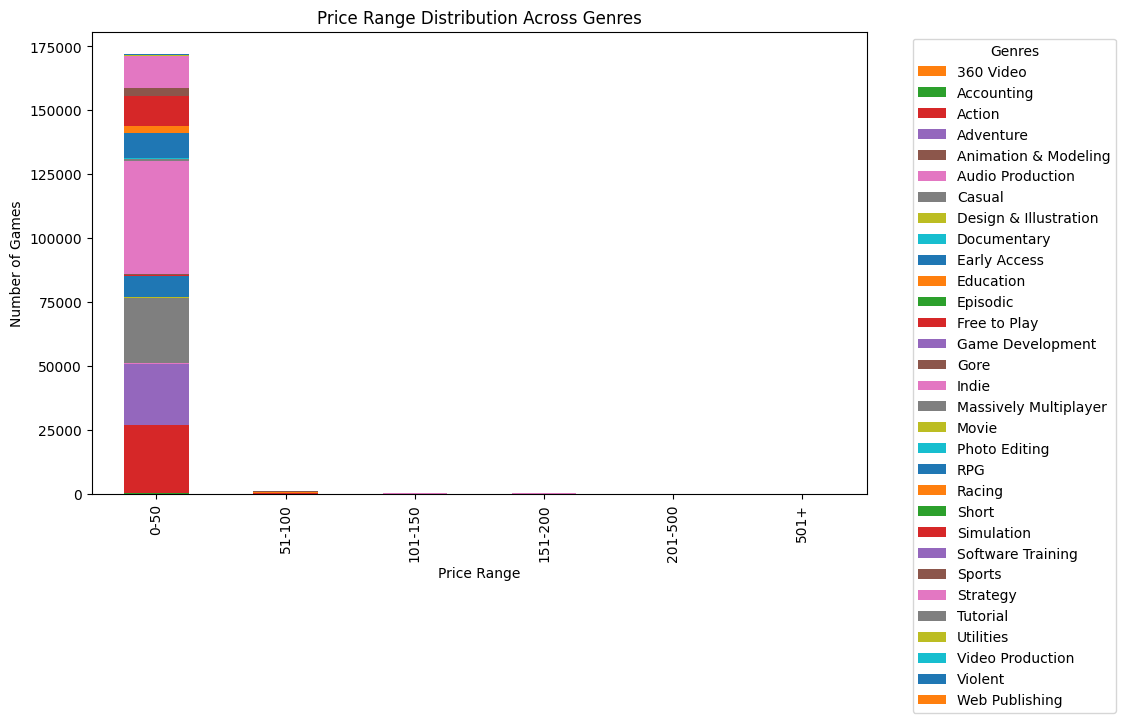

In [110]:
# Create bins for Price ranges
df_genres["Price Range"] = pd.cut(
    df_genres["Price"],
    bins=[0, 50, 100, 150, 200, 500, 1000],
    labels=["0-50", "51-100", "101-150", "151-200", "201-500", "501+"],
)

# Count how many games fall within each Price Range for each Genre
price_range_genre_count = (
    df_genres.groupby(["Price Range", "Genres"]).size().unstack().fillna(0)
)

# Plot the count of games for each Genre across Price Ranges
price_range_genre_count.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Price Range Distribution Across Genres")
plt.xlabel("Price Range")
plt.ylabel("Number of Games")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

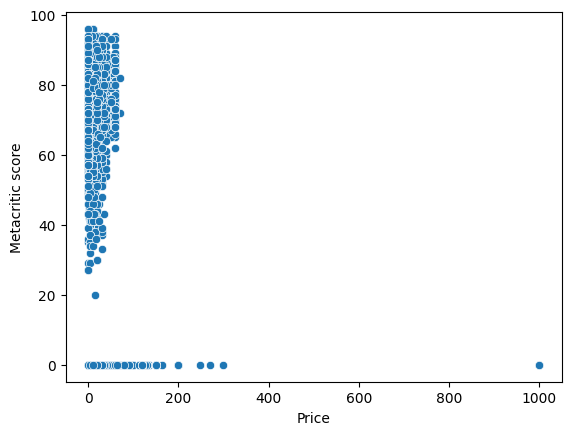

In [111]:
# Pair plot to explore relationships between Price and other variables
sns.scatterplot(data=df, x="Price", y="Metacritic score")
# plt.title("Pair Plot of Price and Related Variables")
plt.show()

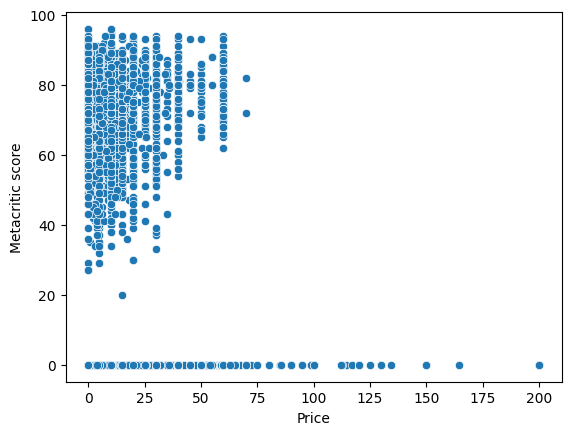

In [112]:
# Pair plot to explore relationships between Price and other variables
sns.scatterplot(data=df_price_filtered, x="Price", y="Metacritic score")
# plt.title("Pair Plot of Price and Related Variables")
plt.show()

In [113]:
categories = []
for item in df["Genres"].tolist():
    categories.extend(item.split(","))
set(categories)
df.loc[df["Genres"].str.contains("Utilities")]

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,Price Range,release_year
31,1727670,Home Office Tasker,"Sep 8, 2021",0 - 20000,0,0,0.99,0,You no longer need to go to special applicatio...,"['English', 'Russian', 'German', 'Spanish - Sp...",...,0,lonch.me,lonch.me,NaN,Utilities,"Utilities,Time Management,Time Manipulation,So...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2021
260,304970,SolidFace Parametric CAD Modeler 2D/3D,"Dec 22, 2014",0 - 20000,0,0,0.00,0,Part module SolidFace Sketch automatically cre...,"['English', 'Portuguese - Brazil']",...,0,"SolidFace Technology Inc.,Oscar L.",SolidFace Technology Inc.,Single-player,"Animation & Modeling,Design & Illustration,Uti...","Design & Illustration,Animation & Modeling,Uti...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,NaN,2014
345,388080,Borderless Gaming,"Jul 23, 2015",200000 - 500000,570,0,3.99,1,Borderless Gaming forces borderless-fullscreen...,"['English', 'German', 'Russian', 'French', 'Si...",...,2526,"AndrewMD5,Codeusa",NaN,"Single-player,Steam Achievements,Steam Trading...",Utilities,"Utilities,Software,Indie,Anime",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2015
358,417540,Gamefuel Driver Control,"Dec 10, 2015",20000 - 50000,0,0,29.99,0,The problem: You may have hardware or devices ...,['English'],...,0,Auslogics Software,Console Classics,NaN,Utilities,Utilities,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2015
449,620050,Start10,"May 11, 2017",0 - 20000,0,0,4.99,0,Customize your Start menu for easy access to U...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,Stardock,Stardock,NaN,Utilities,"Utilities,Software",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84517,2576020,Movavi Video Suite 2024 Steam Edition,"Dec 18, 2023",0 - 20000,2,0,89.99,22,Make your every video project a breeze: be it ...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,Movavi,Movavi,NaN,"Animation & Modeling,Audio Production,Design &...","Utilities,Video Production,Photo Editing,Anima...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,51-100,2023
84549,2717280,Sniper Simulator,"Dec 19, 2023",0 - 20000,1,0,4.99,0,Sniper Simulator is a sniping teaching app. Th...,"['English', 'Simplified Chinese']",...,0,SUN JINZHE,SUN JINZHE,NaN,"Education,Utilities","Education,Utilities,Sniper",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2023
84637,2641350,YoloX - Crosshair Overlay,"Dec 21, 2023",0 - 20000,5,0,5.99,0,Use YoloX to change your game crosshair. Inclu...,"['English', 'Simplified Chinese']",...,0,Dragonrise Games,Dragonrise Games,"Steam Workshop,Includes level editor","Action,Animation & Modeling,Design & Illustrat...","Utilities,Software Training,Action,Design & Il...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2023
84673,2603950,Timeline 存档守护者 -Manage your game save,"Dec 28, 2023",0 - 20000,0,0,3.99,0,Timeline is a game utility tool designed prima...,"['Simplified Chinese', 'English']",...,0,a little dream,a little dream,NaN,"Indie,Education,Photo Editing,Software Trainin...","Indie,Utilities,Photo Editing,Education,Softwa...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2023


### Removing NaN values


In [114]:
df = handle_missing_values(df)
df.isnull().values.any()

np.True_

### Removing rows that are not games


In [115]:
# Remove any entries that are not games (like Utilities)
df = remove_non_games(df)
df

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,Price Range,release_year
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,Perpetual FX Creative,Selfpublished,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2008
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2017
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,Campião Games,Selfpublished,Single-player,"Action,Adventure,Indie,Strategy",,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2021
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,Odd Critter Games,Selfpublished,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2020
5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,Feel tired of auto-fight? Feel tired of boring...,['English'],...,0,7Road,Selfpublished,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,NaN,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85097,2669080,Mannerheim's Saloon Car,"Jan 2, 2024",0 - 0,0,0,0.00,0,Marshal Mannerheim’s Saloon Car is the train c...,"['English', 'Finnish']",...,0,Xamk Game Studios,"Sodan ja rauhan keskus Muisti, Päämajamuseo","Single-player,Tracked Controller Support,VR Only","Adventure,Simulation",,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,NaN,2024
85098,2736910,Beer Run,"Jan 3, 2024",0 - 0,0,0,0.00,0,Beer Run is an Indie game created to steal bee...,['English'],...,0,955 Games,Selfpublished,Single-player,"Casual,Indie",,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,NaN,2024
85099,2743220,My Friend The Spider,"Jan 4, 2024",0 - 0,0,0,0.00,0,A small 'horror' narrative game about isolatio...,['English'],...,0,MCA,Selfpublished,Single-player,"Adventure,Simulation",,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,NaN,2024
85100,2293130,Path of Survivors,"Jan 8, 2024",0 - 0,0,0,3.99,0,Path of Survivors is a multi-class auto-battle...,['English'],...,0,Limited Input,Selfpublished,"Single-player,Steam Achievements,Partial Contr...","Action,Casual,Indie,RPG,Simulation",,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2024


### Droping the columns


In [116]:
columns_to_drop = [
    "AppID",
    "Full audio languages",
    "Header image",
    "Website",
    "Support url",
    "Support email",
    "Metacritic url",
    "Score rank",
    "Achievements",
    "Screenshots",
    "Movies",
]
df = df_filtered.drop(columns=columns_to_drop, errors='ignore')

### Categorical to numerical


In [117]:
df.dtypes

# estimated owners - convert
# About the game - drop
# Supported languages - drop
# reviews - drop
# windoes - drop
# linux - drop
# mac - drop
# notes - drop
# developers - drop
# publishers - drop

Name                            object
Release date                    object
Estimated owners                object
Peak CCU                         int64
Required age                     int64
Price                          float64
DLC count                        int64
About the game                  object
Supported languages             object
Reviews                         object
Windows                           bool
Mac                               bool
Linux                             bool
Metacritic score                 int64
User score                       int64
Positive                         int64
Negative                         int64
Recommendations                  int64
Notes                           object
Average playtime forever         int64
Average playtime two weeks       int64
Median playtime forever          int64
Median playtime two weeks        int64
Developers                      object
Publishers                      object
Categories               

In [118]:
df = add_release_season_column(df)
df = convert_estimated_owners_to_midpoints(df)
df = add_review_columns(df)
df = add_online_offline_column(df)
df = add_player_type_numeric_column(df)

In [119]:
# test = df_filtered.select_dtypes(exclude=['object'])
# test.dtypes

In [120]:
# df_filtered.isnull().values.any()
# lista = df_filtered.columns[df_filtered.isna().any()].tolist()
# lista
# df_filtered[lista].to_csv("poop.csv")

### Removing the outliers


In [121]:
# only keep columns with numerical data
n_neighbors = 20
df_numeric = df[['Peak CCU', 'Required age', 'Price', 'DLC count', 'Windows', 'Mac',
    'Linux', 'Metacritic score', 'User score', 'Positive', 'Negative',
    'Recommendations', 'Average playtime forever',
    'Average playtime two weeks', 'Median playtime forever',
    'Median playtime two weeks']]

# broad outliers detection
clf = LocalOutlierFactor(n_neighbors=n_neighbors)
df_filtered = clf.fit_predict(df_numeric)
df = df[df_filtered != -1]

all_genres = get_set_of_all_genres(df)

def func(row):
    # if type(row["Genres"]) is not str:
    #     print(f'{row["Genres"]}, {row["Name"]}, {type(row["Genres"])}')
    return set(str(row["Genres"]).split(',')) == all_genres

# specific outliers detection
# remove any game that happens to have all the possible genres
df_filtered = df.apply(func, axis=1)
df = df[~df_filtered]
# df = remove_outliers(df)

### Scaling


In [122]:
# code for scaling
df = df.drop(columns=["release_season_num"])
df = scaling(df.select_dtypes(include=["number"]), "minmax")

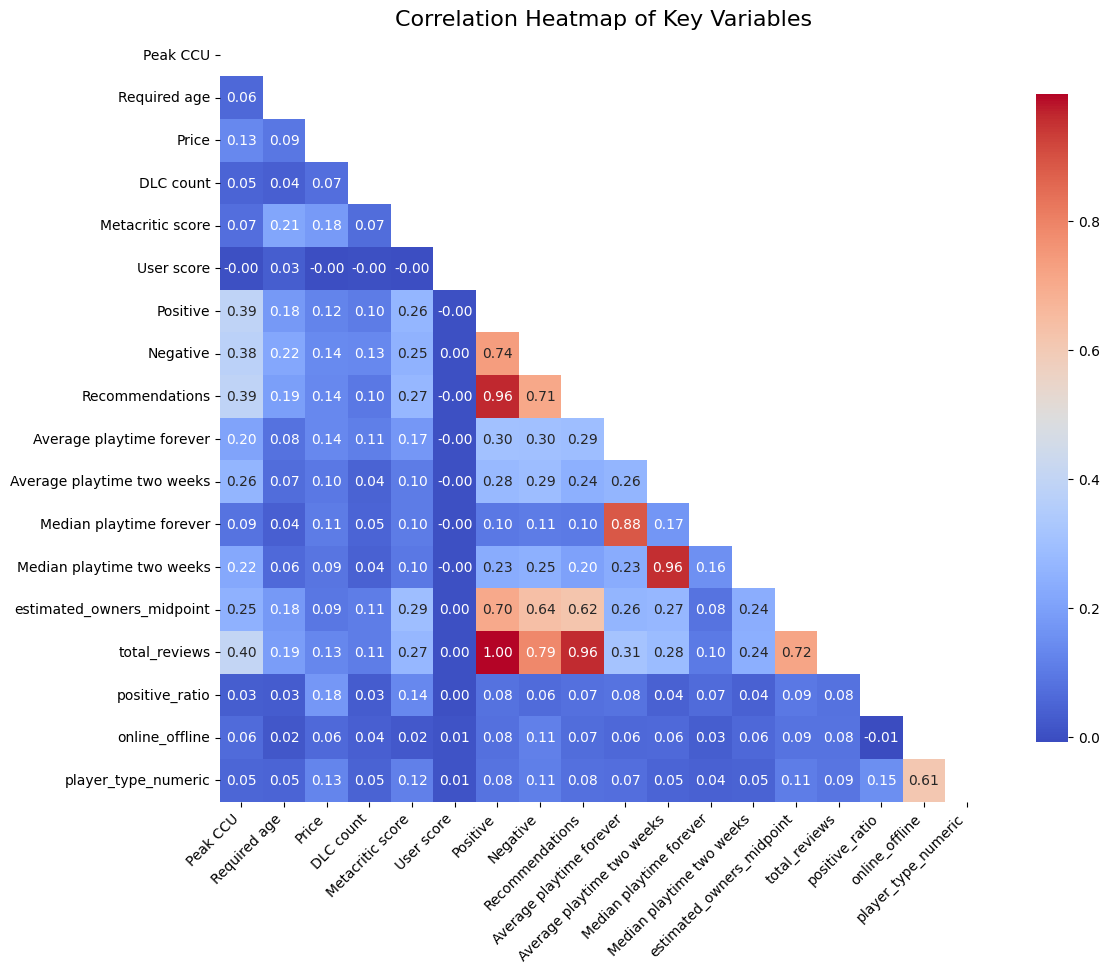

In [123]:
# Correlation heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
# df = pd.DataFrame(...) # Assume df is your DataFrame

# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))  # Adjust the size as needed

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", mask=mask, cmap="coolwarm", square=True, cbar_kws={"shrink": .8})

# Rotate x and y labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Set the title
plt.title("Correlation Heatmap of Key Variables", fontsize=16)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


### PCA


Selected features: Index(['Peak CCU', 'Required age', 'Price', 'DLC count', 'Metacritic score',
       'User score', 'Positive', 'Negative', 'Recommendations',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks',
       'estimated_owners_midpoint', 'total_reviews', 'positive_ratio',
       'online_offline', 'player_type_numeric'],
      dtype='object')
Explained variance ratio: [0.43505909 0.37011341 0.08904667 0.07292329]
Cumulative explained variance ratio: [0.43505909 0.8051725  0.89421916 0.96714246]
[[-0.03610011  0.31006044  0.44983961 -0.30774122]
 [ 0.23988459 -0.26947693 -0.06872018 -0.02813079]
 [-0.57836932  0.1178449   0.05160731 -0.02194483]
 ...
 [-0.57900737  0.11781627  0.05077607 -0.02283145]
 [-0.57849818  0.11783874  0.0514383  -0.02212685]
 [-0.57773248  0.11787254  0.05243414 -0.02106731]]


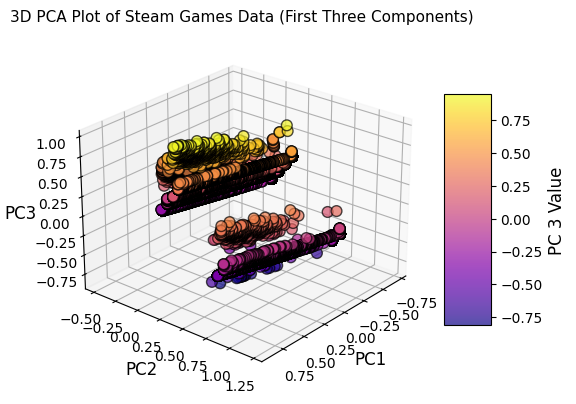

In [124]:
# Code for 
# df.isnull().values.any()
# df.columns[df.isna().any()].tolist()
pca, _ = implement_PCA(df, df.columns)
print(pca)
plot_PCA(pca)